## *Loading Environment*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)  
sns.set_palette('viridis')
sns.set_style("dark")
import warnings
warnings.filterwarnings("ignore")

## *Loading Data*

In [2]:
df = pd.read_csv("US_Accidents_March23.csv")

## *Data Exploration*

In [3]:
df.shape

(7728394, 46)

In [4]:
df.columns.tolist()

['ID',
 'Source',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [5]:
df.dtypes

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

In [6]:
df.head(3)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865,-84.059,NaN,NaN,0.010,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.900,NaN,91.000,29.680,10.000,Calm,NaN,0.020,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928,-82.831,NaN,NaN,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.900,NaN,100.000,29.650,10.000,Calm,NaN,0.000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063,-84.033,NaN,NaN,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.000,33.300,100.000,29.670,10.000,SW,3.500,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day


**To identify the number of numerial columns**

In [7]:
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
numeric_df = df.select_dtypes(include=numerics)
num_numeric_cols = len(numeric_df.columns)

In [8]:
num_numeric_cols

13

**Exploring the missing Values**

In [9]:
missing_percentages = (df.isna().sum() / len(df)).sort_values(ascending=False)
missing_percentages

End_Lat                 0.440
End_Lng                 0.440
Precipitation(in)       0.285
Wind_Chill(F)           0.259
Wind_Speed(mph)         0.074
Visibility(mi)          0.023
Wind_Direction          0.023
Humidity(%)             0.023
Weather_Condition       0.022
Temperature(F)          0.021
Pressure(in)            0.018
Weather_Timestamp       0.016
Nautical_Twilight       0.003
Civil_Twilight          0.003
Sunrise_Sunset          0.003
Astronomical_Twilight   0.003
Airport_Code            0.003
Street                  0.001
Timezone                0.001
Zipcode                 0.000
City                    0.000
Description             0.000
Traffic_Signal          0.000
Roundabout              0.000
Station                 0.000
Stop                    0.000
Traffic_Calming         0.000
Country                 0.000
Turning_Loop            0.000
No_Exit                 0.000
End_Time                0.000
Start_Time              0.000
Severity                0.000
Railway   

In [10]:
missing_percentages[missing_percentages != 0]

End_Lat                 0.440
End_Lng                 0.440
Precipitation(in)       0.285
Wind_Chill(F)           0.259
Wind_Speed(mph)         0.074
Visibility(mi)          0.023
Wind_Direction          0.023
Humidity(%)             0.023
Weather_Condition       0.022
Temperature(F)          0.021
Pressure(in)            0.018
Weather_Timestamp       0.016
Nautical_Twilight       0.003
Civil_Twilight          0.003
Sunrise_Sunset          0.003
Astronomical_Twilight   0.003
Airport_Code            0.003
Street                  0.001
Timezone                0.001
Zipcode                 0.000
City                    0.000
Description             0.000
dtype: float64

In [11]:
type(missing_percentages)

pandas.core.series.Series

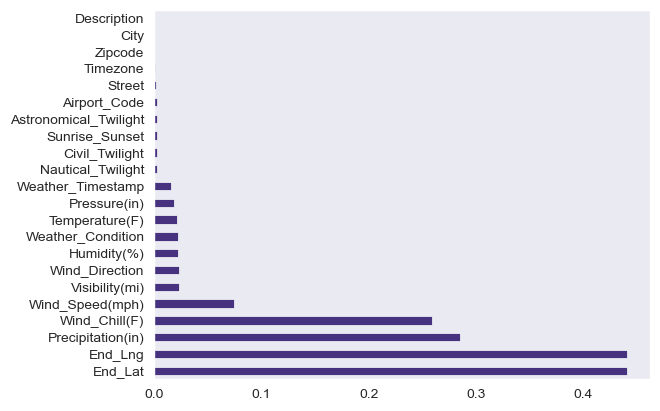

In [12]:
non_zero_missing = missing_percentages[missing_percentages != 0]
non_zero_missing.plot(kind="barh")
plt.show()

In [21]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### Data Exploration of each Column
- To know the insight of each column

### *Severity*

In [74]:
df["Severity"].value_counts()

Severity
2    6156981
3    1299337
4     204710
1      67366
Name: count, dtype: int64

### *Start Time*

In [75]:
df["Start_Time"].value_counts()

Start_Time
2021-01-26 16:16:13    253
2021-01-26 16:17:33    170
2021-02-16 06:42:43    157
2021-11-21 18:37:51    125
2020-12-16 13:53:25     99
                      ... 
2019-06-17 08:32:29      1
2019-06-17 08:12:49      1
2019-06-17 08:05:59      1
2019-06-17 07:58:15      1
2019-08-23 18:52:06      1
Name: count, Length: 5801064, dtype: int64

In [86]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')

In [87]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

In [88]:
df.Start_Time.dt.hour

0           5
1           6
2           6
3           7
4           7
           ..
7728389    18
7728390    19
7728391    19
7728392    19
7728393    18
Name: Start_Time, Length: 7728394, dtype: int32

Text(0.5, 1.0, 'Accident Start Time (24 Hr format)')

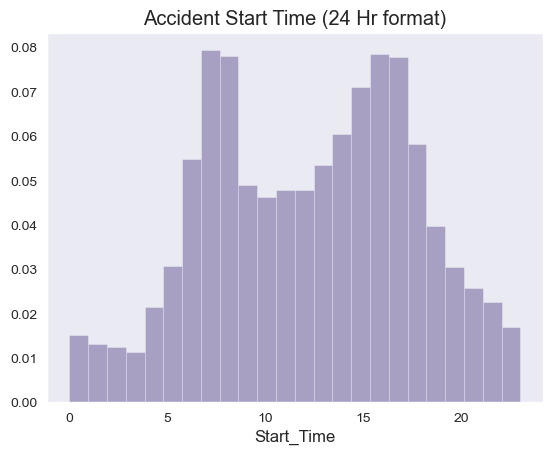

In [91]:
sns.distplot(df.Start_Time.dt.hour, bins = 24, kde = False, norm_hist = True)
plt.title('Accident Start Time (24 Hr format)')

Observation (Which time the accident is high)
- Most accident occured btw 7 - 9 am in the morning
- Most accident accured btw 3 - 5 pm in the afternoon 
- possibly most of the victims are from working baground 

Text(0.5, 1.0, 'Accident by Week')

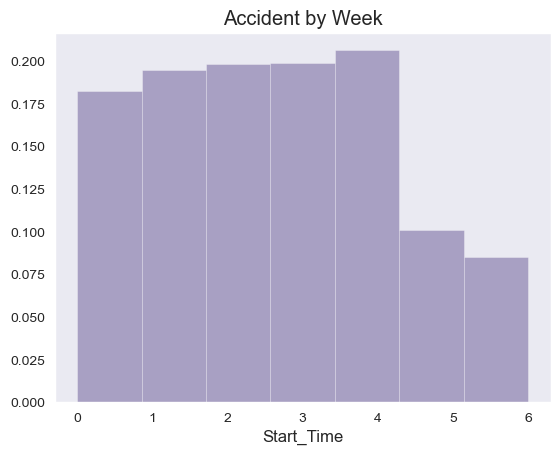

In [92]:
sns.distplot(df.Start_Time.dt.dayofweek, bins = 7, kde = False, norm_hist = True)
plt.title('Accident by Week')

Obsevation ( Which day of the weak experiences most accidents)
- weekends have less accidents notes
- Most accident occured on Friday
- possibly the working sectors might be in some hurry

Since most accident occoured on Friday i will try to find at which time on Friday there was major accidents

Text(0.5, 1.0, 'Accident on Friday by Time (Hr)')

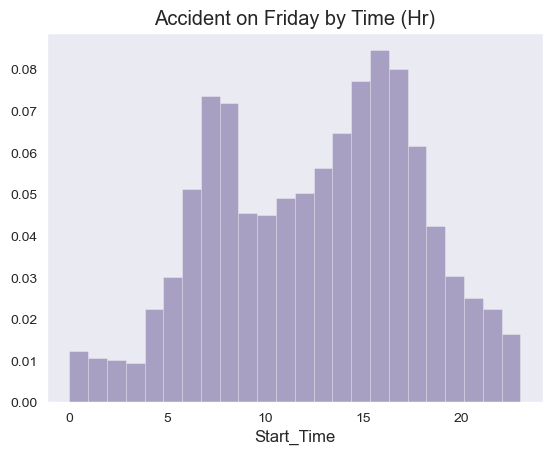

In [95]:
sundays_start_time = df['Start_Time'][df['Start_Time'].dt.dayofweek == 4]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)
plt.title('Accident on Friday by Time (Hr)')

Observation (On what time most accidents are noted on Friday)
- Most accidents can be seen in the moring (7-9 am) and in the evening (3-5 pm)
- moring is having very low number of accidents as compared to other times.

Text(0.5, 1.0, 'Accident on Sunday by Time (Hr)')

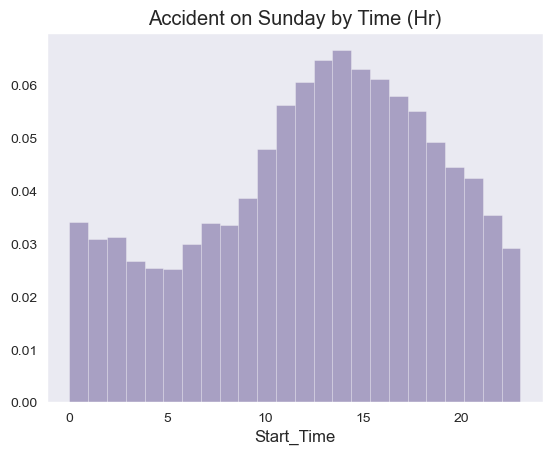

In [98]:
sundays_start_time = df['Start_Time'][df['Start_Time'].dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)
plt.title('Accident on Sunday by Time (Hr)')

Text(0.5, 1.0, 'Monthly basis accident')

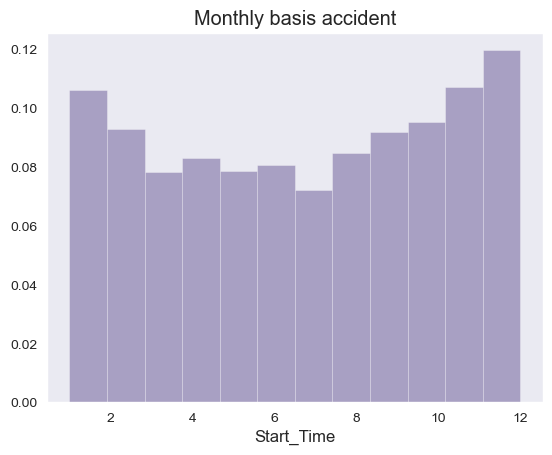

In [99]:
sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)
plt.title('Monthly basis accident')

observations made (Which motnth is having high number of accidents)
- most of the accidents are on winter months.
- Least number of accidents are observed on summer months. 

In [100]:
df.Start_Time.dt.year

0          2016
1          2016
2          2016
3          2016
4          2016
           ... 
7728389    2019
7728390    2019
7728391    2019
7728392    2019
7728393    2019
Name: Start_Time, Length: 7728394, dtype: int32

Text(0.5, 1.0, 'Accidents on 2019')

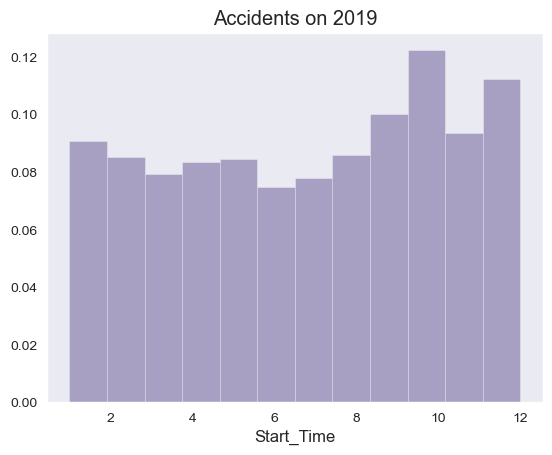

In [102]:
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)
plt.title('Accidents on 2019')

Text(0.5, 1.0, 'Accidents on 2018')

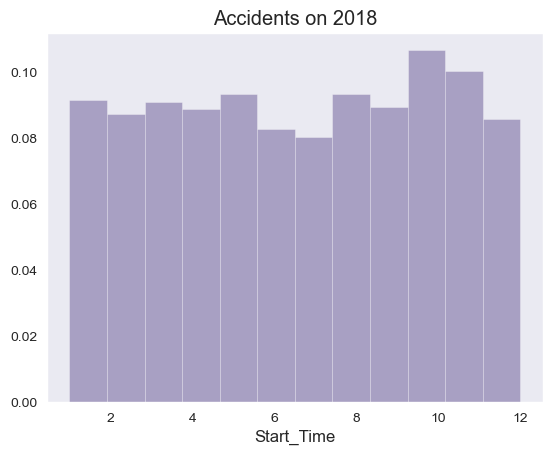

In [112]:
df_2019 = df[df.Start_Time.dt.year == 2018]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)
plt.title('Accidents on 2018')

Text(0.5, 1.0, 'Accidents on 2017')

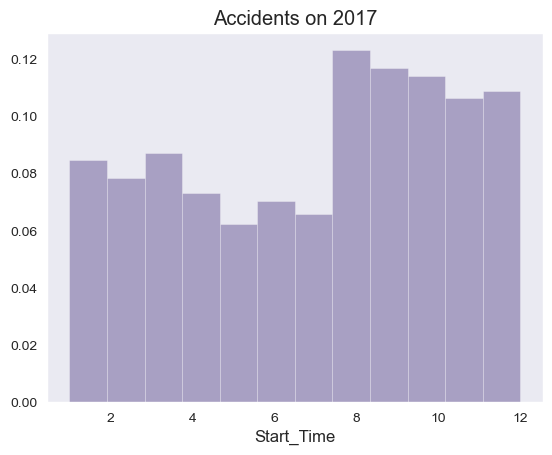

In [113]:
df_2019 = df[df.Start_Time.dt.year == 2017]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)
plt.title('Accidents on 2017')

Text(0.5, 1.0, 'Accidents on 2016')

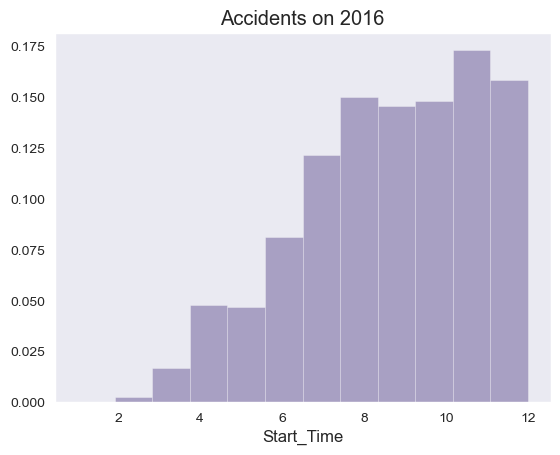

In [119]:
df_2019 = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)
plt.title('Accidents on 2016')

Text(0.5, 1.0, 'Accidents on 2020')

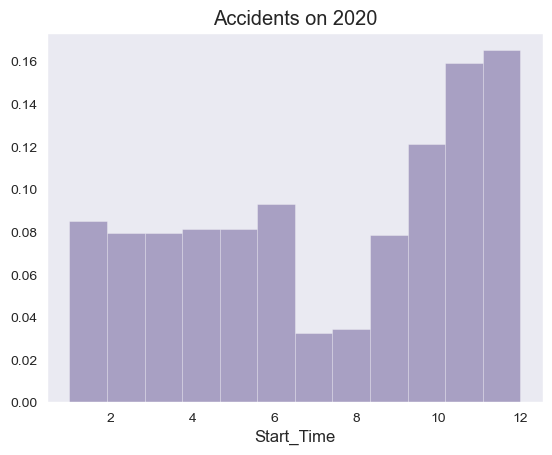

In [117]:
df_2019 = df[df.Start_Time.dt.year == 2020]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)
plt.title('Accidents on 2020')

Text(0.5, 1.0, 'Accidents on 2023')

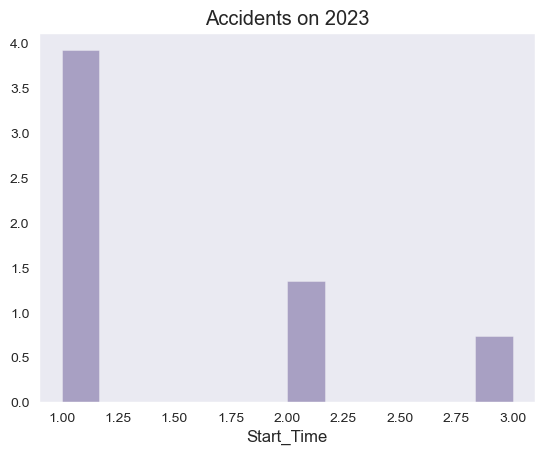

In [120]:
df_2019 = df[df.Start_Time.dt.year == 2023]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)
plt.title('Accidents on 2023')

Obervation (At what time on Sunday there is major number of accidents)
- There is a high number of accidents from 12-5 pm 
- Least number of accidents can be noted in the morning btw 2-5 am 

In [76]:
df["End_Time"].value_counts()

End_Time
2021-11-22 08:00:00    112
2017-05-15 15:22:55     73
2019-10-26 09:14:51     49
2020-02-14 00:00:00     46
2018-11-25 02:51:02     46
                      ... 
2019-01-27 03:35:12      1
2019-01-27 03:01:18      1
2019-01-27 02:32:22      1
2019-01-27 02:29:26      1
2019-08-23 19:21:31      1
Name: count, Length: 6705355, dtype: int64

In [77]:
df["Start_Lat"].value_counts()

Start_Lat
37.808    570
33.941    568
34.859    545
42.477    534
33.745    533
         ... 
40.855      1
38.224      1
41.525      1
41.521      1
34.239      1
Name: count, Length: 2428358, dtype: int64

In [78]:
df["Start_Lng"].value_counts()

Start_Lng
-122.367    578
-118.097    562
-82.260     545
-84.390     534
-83.112     534
           ... 
-117.401      1
-118.429      1
-121.742      1
-121.891      1
-117.848      1
Name: count, Length: 2482533, dtype: int64

In [79]:
df["Street"].value_counts()

Street
I-95 N                  78430
I-95 S                  74528
I-5 N                   71968
I-10 E                  55572
I-10 W                  53725
                        ...  
W Diamond Valley Dr         1
S Jasper St                 1
State RT 17 N               1
 S Lake Mary Jane Rd        1
473-401 Cutoff Rd           1
Name: count, Length: 336306, dtype: int64

In [80]:
df["City"].value_counts()

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [81]:
df["County"].value_counts()

County
Los Angeles        526851
Miami-Dade         251601
Orange             241275
Harris             181196
Dallas             157024
                    ...  
Mclean                  1
Poquoson (City)         1
Dewitt                  1
Frontier                1
Ness                    1
Name: count, Length: 1871, dtype: int64

In [82]:
df["State"].value_counts()

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
AL     101044
UT      97079
CO      90885
OK      83647
MO      77323
CT      71005
IN      67224
MA      61996
WI      34688
KY      32254
NE      28870
MT      28496
IA      26307
AR      22780
NV      21665
KS      20992
DC      18630
RI      16971
MS      15181
DE      14097
WV      13793
ID      11376
NM      10325
NH      10213
WY       3757
ND       3487
ME       2698
VT        926
SD        289
Name: count, dtype: int64

In [4]:
!pip install folium

In [6]:
import folium

In [7]:
lat, lon = df.Start_Lat[0],df.Start_Lng[0]
lat, lon

(39.865147, -84.058723)

In [16]:
for x in df[["Start_Lat", "Start_Lng"]].sample(100).items():
    print(x[1])

5252438   42.730
4966504   29.041
3253151   33.509
1143257   29.717
2987604   38.624
           ...  
4423526   38.986
1109367   31.223
306955    29.815
3738755   33.917
3958770   36.464
Name: Start_Lat, Length: 100, dtype: float64
5252438    -86.147
4966504    -82.061
3253151   -112.048
1143257    -95.557
2987604   -121.239
            ...   
4423526    -94.776
1109367    -85.383
306955     -95.376
3738755   -118.046
3958770    -77.518
Name: Start_Lng, Length: 100, dtype: float64


In [23]:
zip = list(df.Start_Lat), list(df.Start_Lng)

In [26]:
from folium.plugins import HeatMap

In [29]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng))

TypeError: 'tuple' object is not callable

In [30]:
map = folium.Map()

HeatMap(lat_lon_pairs).add_to(map)

NameError: name 'lat_lon_pairs' is not defined

In [9]:
map = folium.Map()
for lat lon in 
marker = folium.Marker((lat,lon))
marker.add_to(map)
map

## *Data Cleaning*

**Droping the unnecessary columns as its making uuneasy to work with the data set**

In [3]:
df = df[[#'ID', 
       'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', #'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', #'Zipcode', 'Country', 
       'Timezone',
       #'Airport_Code', 
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
        # 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', #'Precipitation(in)', 
       'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset'#, 'Civil_Twilight', 'Nautical_Twilight',
        #'Astronomical_Twilight'
        ]].copy()

In [23]:
df.columns

Index(['Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Street', 'City', 'County', 'State', 'Timezone',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Wind_Speed(mph)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset'],
      dtype='object')

In [24]:
df.head()

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Street,City,County,State,Timezone,Weather_Timestamp,Temperature(F),Wind_Chill(F),Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865,-84.059,I-70 E,Dayton,Montgomery,OH,US/Eastern,2016-02-08 05:58:00,36.900,NaN,NaN,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
1,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928,-82.831,Brice Rd,Reynoldsburg,Franklin,OH,US/Eastern,2016-02-08 05:51:00,37.900,NaN,NaN,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
2,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063,-84.033,State Route 32,Williamsburg,Clermont,OH,US/Eastern,2016-02-08 06:56:00,36.000,33.300,3.500,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night
3,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.748,-84.206,I-75 S,Dayton,Montgomery,OH,US/Eastern,2016-02-08 07:38:00,35.100,31.000,4.600,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
4,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.628,-84.188,Miamisburg Centerville Rd,Dayton,Montgomery,OH,US/Eastern,2016-02-08 07:53:00,36.000,33.300,3.500,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day


In [ ]:
**Date Time conversion**

In [26]:
df['Start_Time'].head(3)

0    2016-02-08 05:46:00
1    2016-02-08 06:07:59
2    2016-02-08 06:49:27
Name: Start_Time, dtype: object

In [29]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')

In [31]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

In [33]:
df['Start_Time'].dtype

dtype('<M8[ns]')

In [93]:
df.to_csv('output.csv', index=False)